In [100]:
#import required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
import os

In [101]:
!pwd

/home/sonu/Project/Deep Learning Projects/Surface Crack Detection


In [102]:
positive_dir = Path("/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive")
negative_dir = Path("/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative")

## Create dataframe

In [103]:
#as directory is path object , we can use glob function to find
#certain patterns in the data like images having jpg extension
positive_dir.glob(r'*.jpg')

<generator object Path.glob at 0x7f5c494c6350>

In [104]:
list(positive_dir.glob(r'*.jpg'))

[PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/03174.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/03710.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/15285_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/12447_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/19969.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/12106_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/14953_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/17814_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Positive/15339_1.jpg'),
 PosixPath('/home/sonu/Project/Deep Learnin

In [105]:
list(negative_dir.glob(r'*.jpg'))

[PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/03174.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/03710.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/16783.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/19969.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/12762.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/18142.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/19931.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/07369.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/Surface Crack Detection/data/Negative/08791.jpg'),
 PosixPath('/home/sonu/Project/Deep Learning Projects/S

In [106]:
#function to create a datframe of both postivie and negative series
def generate_dataframe(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    #series of labels
    labels = pd.Series(label, name='Label', index= filepaths.index)
    #concat two series and return df
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [107]:
generate_dataframe(positive_dir, label='POSITIVE')

,Filepath,Label
0,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
1,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
2,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
3,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
4,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
...,...,...
19995,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
19996,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
19997,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
19998,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE


In [108]:
generate_dataframe(negative_dir, label='NEGATIVE')

,Filepath,Label
0,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
1,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
2,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
3,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
4,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
...,...,...
19995,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19996,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19997,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19998,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE


In [109]:
#concat two dataframe in one
#assign to variables
positive_dataframe = generate_dataframe(positive_dir, label='POSITIVE')
negative_dataframe = generate_dataframe(negative_dir, label='NEGATIVE')

#now concat two dataframes on top of each other so axis = 0 this time

all_dataframe = pd.concat([positive_dataframe, negative_dataframe], axis=0)

In [110]:
all_dataframe

,Filepath,Label
0,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
1,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
2,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
3,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
4,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
...,...,...
19995,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19996,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19997,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
19998,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE


#### We concat successfully but all "POSITIVE" are first and later the "NEGATIVE". we want it mix i.e. shuffling.
#### Also the indices are showing wrong because both had 20000 so its starting all again after first 20000.

Let's fix it!!

In [111]:
all_dataframe = all_dataframe.sample(frac=1.0, random_state=1).reset_index(drop=True)

In [112]:
all_dataframe

,Filepath,Label
0,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
1,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
2,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
3,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
4,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
...,...,...
39995,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
39996,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
39997,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
39998,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE


"frac" meaning all 100% of data to be shuffled and random_state for reproducibility. We are resetting index and keeping
drop=True to avoid index to become a new column.

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
train_dataframe, test_dataframe = train_test_split(all_dataframe.sample(30000, random_state=1),
                                                  train_size=0.7,
                                                  shuffle=True,
                                                  random_state=1)

In [115]:
len(train_dataframe)

21000

In [116]:
len(test_dataframe)

9000

In [117]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 31640 to 17079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  21000 non-null  object
 1   Label     21000 non-null  object
dtypes: object(2)
memory usage: 492.2+ KB


In [118]:
train_dataframe

,Filepath,Label
31640,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
13483,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
31753,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
8034,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
18045,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
...,...,...
6100,/home/sonu/Project/Deep Learning Projects/Surf...,NEGATIVE
35101,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
9387,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE
9955,/home/sonu/Project/Deep Learning Projects/Surf...,POSITIVE


## Now let's load the image data

#### we will create couple of image generator objects

In [119]:
import tensorflow as tf

In [120]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print('GPU Available: ', len(gpu_device))
tf.config.experimental.set_memory_growth(gpu_device[0], True)

GPU Available:  1


In [121]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [122]:
train_data =  train_generator.flow_from_dataframe(train_dataframe,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='training')

validation_data = train_generator.flow_from_dataframe(train_dataframe,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_data = train_generator.flow_from_dataframe(test_dataframe,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False,
                                                 seed=42)

Found 16800 validated image filenames belonging to 2 classes.
Found 4200 validated image filenames belonging to 2 classes.
Found 9000 validated image filenames belonging to 2 classes.


In [123]:
#Feature extraction(2 Conv layers, 2 MaxPooling layers)
inputs = tf.keras.Input(shape=(128,128,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x) #we can use Flatten too basically to pass 1D array to Dense layer for classifcation
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33  

In [124]:
history = model.fit(train_data,
                   validation_data=validation_data,
                   epochs=100,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=2,
                                                       restore_best_weights=True)
                   ])

Epoch 1/100
525/525 [==============================] - 32s 61ms/step - loss: 0.5983 - accuracy: 0.6949 - val_loss: 0.4401 - val_accuracy: 0.9171
Epoch 2/100
525/525 [==============================] - 11s 21ms/step - loss: 0.2841 - accuracy: 0.9264 - val_loss: 0.1939 - val_accuracy: 0.9562
Epoch 3/100
525/525 [==============================] - 11s 21ms/step - loss: 0.1607 - accuracy: 0.9550 - val_loss: 0.1312 - val_accuracy: 0.9574
Epoch 4/100
525/525 [==============================] - 11s 21ms/step - loss: 0.1132 - accuracy: 0.9668 - val_loss: 0.1137 - val_accuracy: 0.9605
Epoch 5/100
525/525 [==============================] - 11s 21ms/step - loss: 0.0988 - accuracy: 0.9716 - val_loss: 0.0882 - val_accuracy: 0.9700
Epoch 6/100
525/525 [==============================] - 11s 21ms/step - loss: 0.0872 - accuracy: 0.9752 - val_loss: 0.0875 - val_accuracy: 0.9779
Epoch 7/100
525/525 [==============================] - 11s 21ms/step - loss: 0.0838 - accuracy: 0.9759 - val_loss: 0.0705 - val_ac

In [125]:
import plotly
from plotly import version
print (version)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<module 'plotly.version' from '/home/sonu/.local/lib/python3.8/site-packages/plotly/version.py'>


In [126]:
fig = px.line(history.history,
             y=['loss', 'val_loss'],
             labels= {'index': 'Epoch', 'value':'loss'},
             title= 'Training and Validation Loss Over Time')
plotly.offline.plot(fig)

'temp-plot.html'

In [127]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [128]:
model.predict(test_data)

array([[0.9999999 ],
       [0.02521167],
       [0.02243268],
       ...,
       [0.98330325],
       [0.99954575],
       [0.9969258 ]], dtype=float32)

In [129]:
np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))

array([1, 0, 0, ..., 1, 1, 1])

In [130]:
test_data.labels

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [134]:
def evaluate_model(model, test_data):
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("Test Loss: {:.5f}".format(loss))
    print("Test Accuracy {:.2f}%".format(acc*100))
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=['NEGATIVE', 'POSITIVE'])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar='False')
    plt.xticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print("Classification Report:\n---------------\n", clr)

Test Loss: 0.07802
Test Accuracy 97.47%


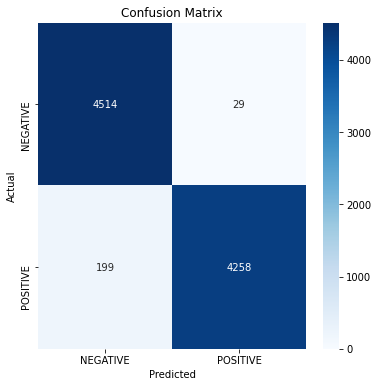

Classification Report:
---------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.99      0.98      4543
    POSITIVE       0.99      0.96      0.97      4457

    accuracy                           0.97      9000
   macro avg       0.98      0.97      0.97      9000
weighted avg       0.98      0.97      0.97      9000



In [135]:
evaluate_model(model, test_data)

In [136]:
import os.path
if os.path.isfile('crack_model.h5') is False:
    model.save('crack_model.h5')
    print("Model Saved!")

Model Saved!


In [137]:
from tensorflow.keras.models import load_model
new_model = load_model('crack_model.h5')

In [138]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33  

In [139]:
new_model.get_weights()

[array([[[[-2.20459417e-01, -8.08721688e-03,  2.67343640e-01,
            5.58235161e-02,  7.25928023e-02, -2.13973716e-01,
            1.59908354e-01, -1.10399619e-01, -9.96527523e-02,
           -2.72553358e-02, -3.08123291e-01, -1.47386655e-01,
            1.94987372e-01,  1.18679874e-01, -2.01266140e-01,
           -3.37186046e-02],
          [-7.70251900e-02, -1.18131049e-01,  7.81842247e-02,
            1.61069080e-01, -1.46121420e-02, -1.55239895e-01,
            2.47355811e-02, -2.31496781e-01, -1.44452259e-01,
           -1.74399972e-01, -2.41948292e-01,  9.46061015e-02,
           -6.15600385e-02, -4.05146554e-02, -2.02705264e-01,
            1.29465550e-01],
          [-1.46769956e-01,  5.55157810e-02,  2.07953274e-01,
           -8.66001993e-02, -1.72742590e-01, -2.24055633e-01,
            1.28030673e-01, -2.29129523e-01, -2.05647275e-01,
           -1.27504915e-01, -1.88323915e-01,  1.24161735e-01,
           -1.16107473e-03,  8.30008388e-02, -2.35606402e-01,
            

In [140]:
new_model.optimizer

In [141]:
json_string = model.to_json()

In [142]:
json_string

'{"class_name": "Model", "config": {"name": "model_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_2"}, "name": "input_2", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "dtype": "float32", "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2d_2", "inbound_nodes": [[["input_2", 0, 0, {}]]]}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_2", "trainable": true, "dtype": "float32", "pool_size": [2, 2

In [143]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [144]:
model_architecture.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33  

In [145]:
import os.path
if os.path.isfile('my_model_weights.h5') is False:
    model.save_weights('my_model_weights.h5')
    print("Model Saved!")

Model Saved!
